# Benchmark Information

## Notes
Estimating resnet50_netdef on shared dual GPU server

## Client 1
### Machine type
custom (4 vCPUs, 14 GB memory)
### CPU platform
Intel Broadwell
### Zone
us-central1-a
### Command
`python3 benchmark.py -u 10.128.0.31 -m resnet50_netdef --qps 150.0 --qps-delta 1.0 -f Dataset/ --sla 0.75 --percentile 95 --threads 4`

## Client 2
### Machine type
custom (4 vCPUs, 14 GB memory)
### CPU platform
Intel Broadwell
### Zone
us-central1-a
### Command
`python3 benchmark.py -u 10.128.0.31 -m inception_graphdef --qps 154.0 --infinite --qps-delta 0 -f Dataset/ --sla 0.75 --percentile 95 --threads 4`

## Server
### Machine type
custom (6 vCPUs, 12 GB memory)
### CPU platform
Intel Broadwell
### GPUs
1 x NVIDIA Tesla P4
### Zone
us-central1-a

## General
### Dataset
5392 Images
### Model Config
```
name: "inception_graphdef"
platform: "tensorflow_graphdef"
max_batch_size: 128
input [
  {
    name: "input"
    data_type: TYPE_FP32
    format: FORMAT_NHWC
    dims: [ 299, 299, 3 ]
  }
]
output [
  {
    name: "InceptionV3/Predictions/Softmax"
    data_type: TYPE_FP32
    dims: [ 1001 ]
    label_filename: "inception_labels.txt"
  }
]
instance_group [
  {
    count: 1
    kind: KIND_GPU
    gpus: [ 0, 1 ]
  }
]
dynamic_batching {
  preferred_batch_size: [ 8 ]
  max_queue_delay_microseconds: 20000000
}
```
```
name: "resnet50_netdef"
platform: "caffe2_netdef"
max_batch_size: 128
input [
  {
    name: "gpu_0/data"
    data_type: TYPE_FP32
    format: FORMAT_NCHW
    dims: [ 3, 224, 224 ]
  }
]
output [
  {
    name: "gpu_0/softmax"
    data_type: TYPE_FP32
    dims: [ 1000 ]
    label_filename: "resnet50_labels.txt"
  }
]
instance_group [
  {
    count: 1
    kind: KIND_GPU
    gpus: [ 0, 1 ]
  }
]
dynamic_batching {
  preferred_batch_size: [ 8 ]
  max_queue_delay_microseconds: 20000000
}
```

## Import Libraries

In [0]:
from mlxtend.plotting import ecdf
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
from IPython.display import Image
import io
plt.rcParams.update({'figure.max_open_warning': 0})

## Load Inception Files

In [0]:
df_inception = pd.read_csv("test_11_inception_results.csv", header=None)
df_inception.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5352,5353,5354,5355,5356,5357,5358,5359,5360,5361,5362,5363,5364,5365,5366,5367,5368,5369,5370,5371,5372,5373,5374,5375,5376,5377,5378,5379,5380,5381,5382,5383,5384,5385,5386,5387,5388,5389,5390,5391
66,0.136156,0.123587,0.129298,0.110509,0.117234,0.097575,0.090656,0.104244,0.108999,0.101077,0.095996,0.089241,0.082292,0.076190,0.068479,0.115117,0.132094,0.125988,0.121925,0.132136,0.103528,0.096131,0.109000,0.115523,0.106169,0.111849,0.073591,0.086806,0.099002,0.092417,0.079618,0.067379,0.131313,0.124995,0.118134,0.111458,0.105066,0.091992,0.098938,0.084990,...,0.138623,0.131779,0.099204,0.125918,0.119228,0.112442,0.106792,0.093233,0.117353,0.124640,0.092294,0.131315,0.112005,0.085114,0.091785,0.104759,0.128082,0.121851,0.115299,0.102357,0.095250,0.081807,0.108195,0.089448,0.144750,0.125668,0.106248,0.099266,0.131969,0.117872,0.111747,0.138512,0.123729,0.110864,0.097654,0.116502,0.103782,0.091220,0.130907,0.084234
67,0.123558,0.136027,0.129710,0.116975,0.111217,0.098134,0.104135,0.091449,0.112779,0.118897,0.099315,0.106372,0.093025,0.072357,0.078996,0.086699,0.131750,0.121301,0.118991,0.112804,0.106515,0.093562,0.098225,0.087290,0.122214,0.103270,0.096800,0.115990,0.076996,0.088539,0.110014,0.083067,0.136398,0.122389,0.122327,0.116883,0.090660,0.110012,0.103786,0.097017,...,0.122347,0.092310,0.079936,0.074251,0.119496,0.087320,0.067357,0.100391,0.095782,0.089684,0.102651,0.070159,0.082721,0.056790,0.077171,0.062958,0.099166,0.106512,0.086770,0.066745,0.060806,0.093315,0.073452,0.078378,0.101227,0.088344,0.082632,0.056340,0.063012,0.069356,0.095331,0.076271,0.099535,0.104732,0.066849,0.092416,0.086234,0.079118,0.060578,0.073639
68,0.115501,0.109396,0.083810,0.096795,0.102713,0.090500,0.064244,0.077451,0.102765,0.095916,0.089478,0.082888,0.068748,0.076560,0.061120,0.055853,0.101916,0.089585,0.096933,0.083686,0.069854,0.077486,0.057896,0.063534,0.100982,0.094495,0.087833,0.067637,0.061389,0.074821,0.055368,0.082142,0.109385,0.096905,0.103548,0.070735,0.063250,0.077644,0.089683,0.084362,...,0.103416,0.089616,0.083841,0.077397,0.070977,0.096849,0.057357,0.064314,0.098615,0.104760,0.071797,0.092165,0.066169,0.058990,0.078380,0.086536,0.105670,0.111951,0.099652,0.093151,0.086555,0.072152,0.079709,0.065872,0.097197,0.091526,0.071223,0.064988,0.058418,0.077456,0.085386,0.103561,0.087930,0.062131,0.068775,0.055192,0.094791,0.082109,0.100804,0.075042
69,0.113511,0.100627,0.087381,0.073960,0.107134,0.094369,0.076484,0.068221,0.098354,0.089785,0.081875,0.070457,0.087364,0.076695,0.062838,0.056400,0.103281,0.090012,0.094307,0.070705,0.083926,0.077329,0.058161,0.061781,0.087093,0.094450,0.068432,0.062030,0.100873,0.074785,0.080929,0.055414,0.092243,0.098032,0.085576,0.079227,0.104424,0.069025,0.066499,0.059137,...,0.099669,0.094325,0.087075,0.081341,0.055150,0.067636,0.075019,0.062271,0.101201,0.095614,0.082675,0.063837,0.069726,0.089565,0.076535,0.057423,0.101746,0.095264,0.062460,0.088639,0.069047,0.056133,0.081518,0.076321,0.105576,0.099112,0.088081,0.086037,0.080061,0.061072,0.073657,0.060351,0.103000,0.087816,0.082929,0.087790,0.063265,0.070178,0.056345,0.077733
70,0.100935,0.094919,0.088389,0.068364,0.081189,0.061735,0.075516,0.055209,0.103195,0.090458,0.096758,0.084249,0.058114,0.064575,0.070827,0.077734,0.101520,0.094796,0.081328,0.087593,0.055182,0.069122,0.075730,0.059868,0.104357,0.090925,0.078222,0.071548,0.084748,0.097599,0.065006,0.058198,0.101785,0.088619,0.075438,0.055187,0.082397,0.062738,0.094864,0.068786,...,0.081111,0.074698,0.087806,0.068396,0.062055,0.055092,0.094087,0.101316,0.108323,0.096241,0.102853,0.083533,0.076444,0.070058,0.090336,0.063705,0.094316,0.101643,0.081394,0.088622,0.075502,0.068581,0.062153,0.058115,0.099704,0.103931,0.094010,0.073323,0.080405,0.086946,0.060197,0.066866,0.100517,0.081192,0.061313,0.067981,0.095063,0.075562,0.088686,0.108416


## Inception ECDFs 

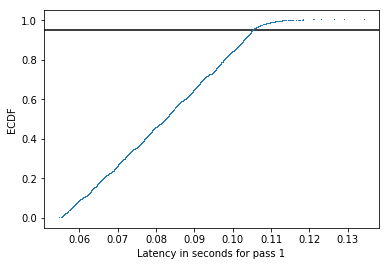

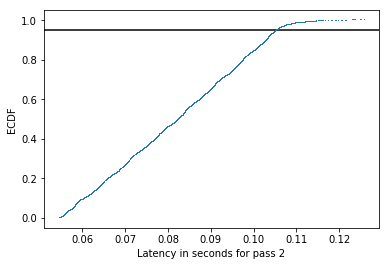

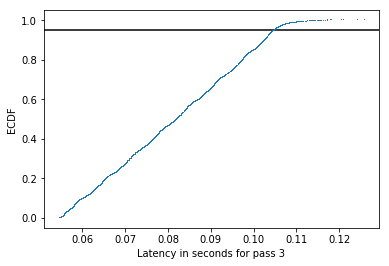

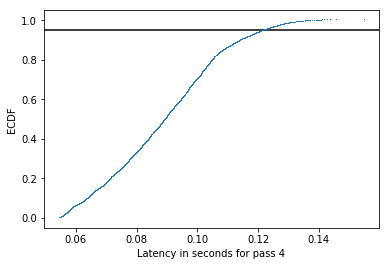

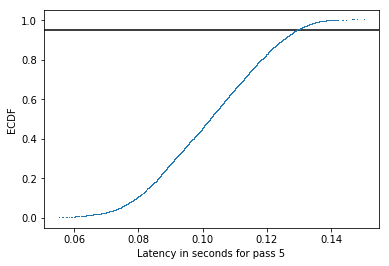

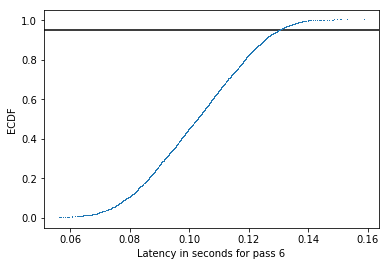

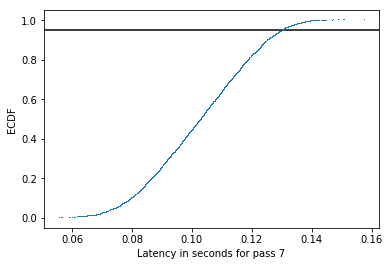

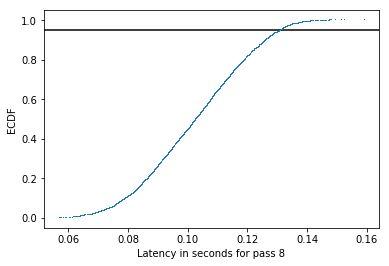

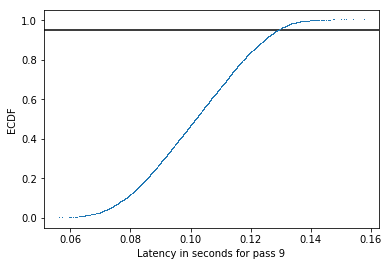

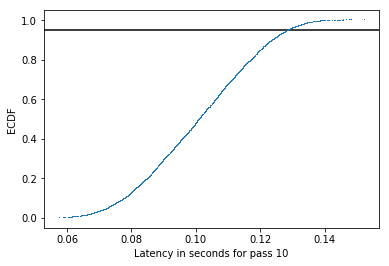

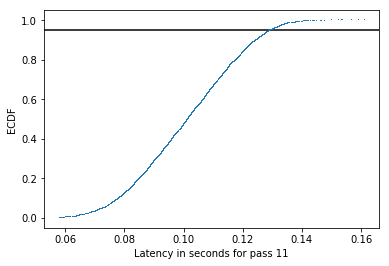

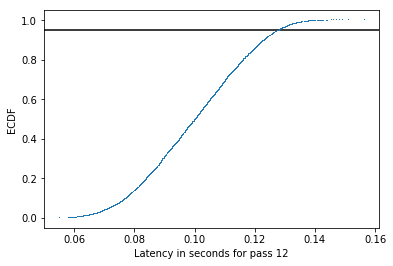

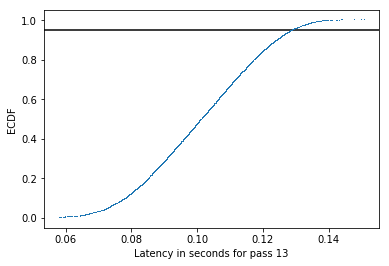

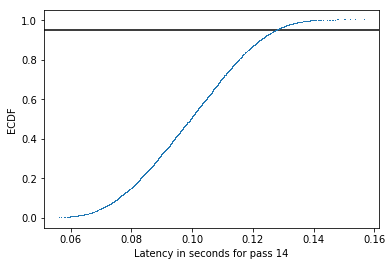

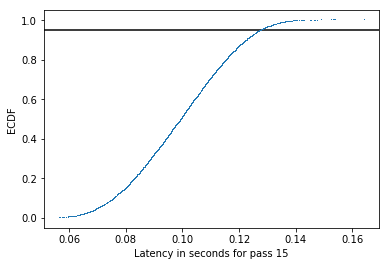

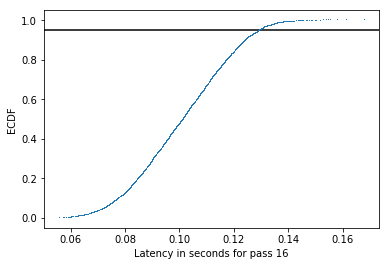

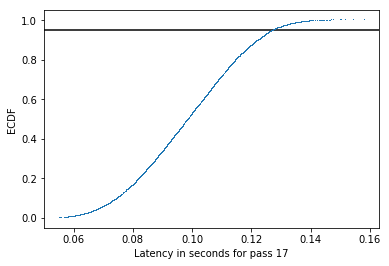

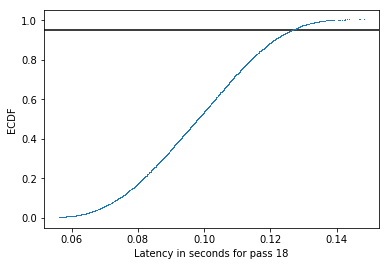

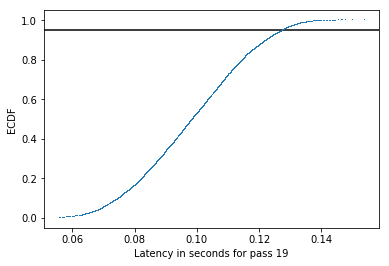

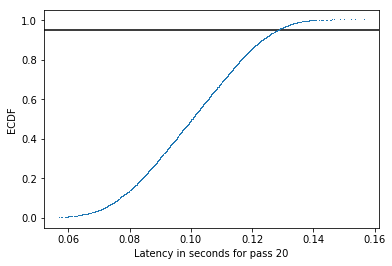

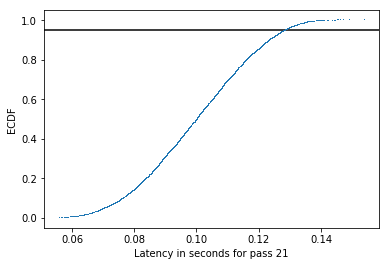

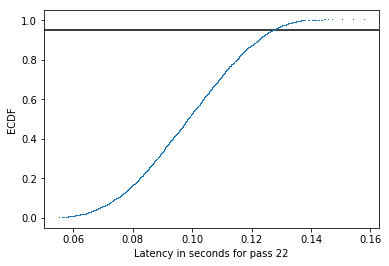

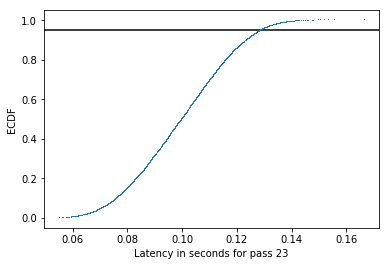

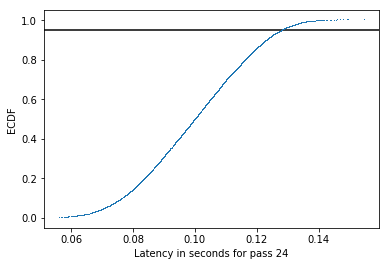

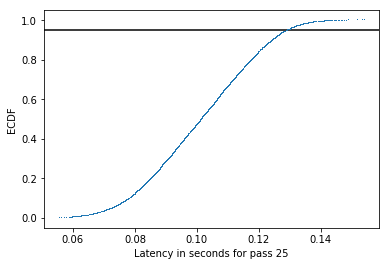

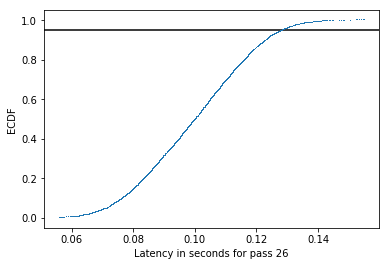

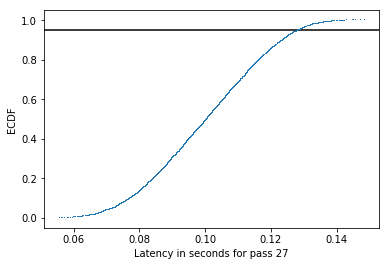

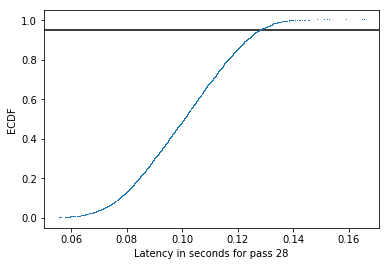

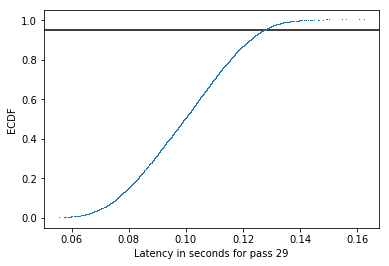

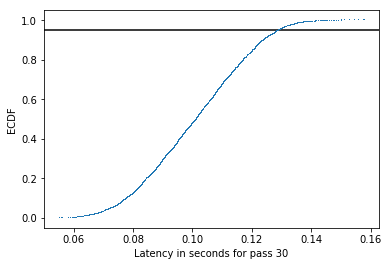

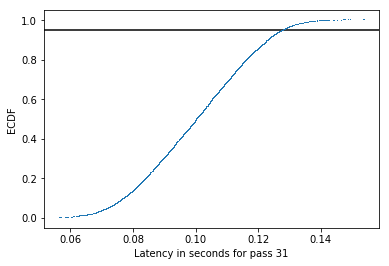

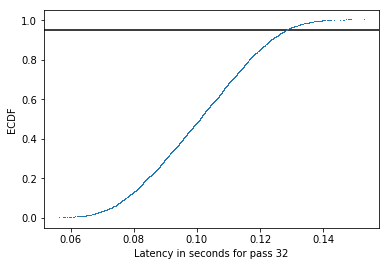

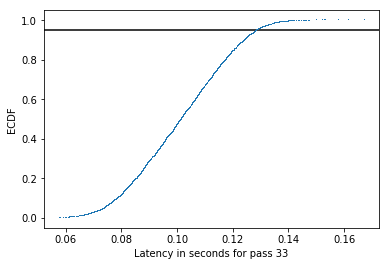

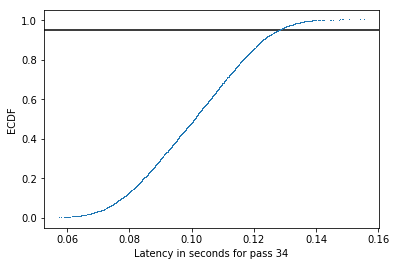

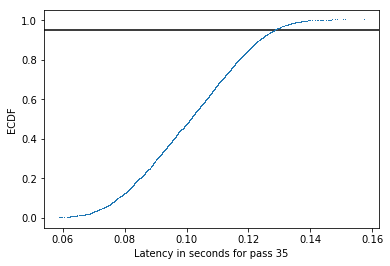

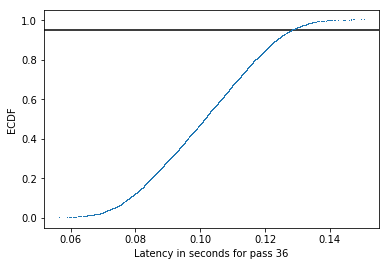

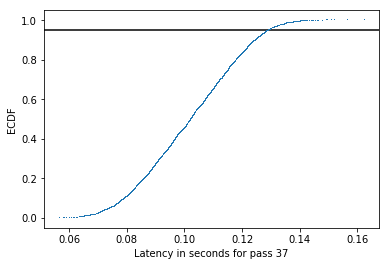

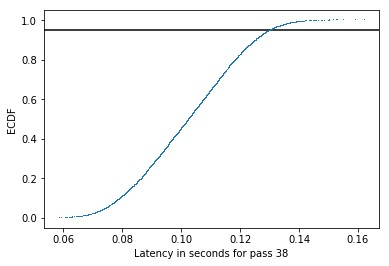

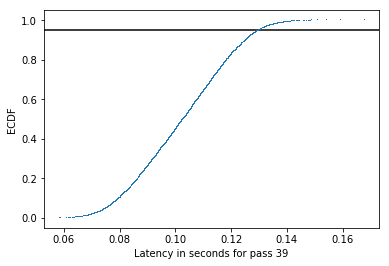

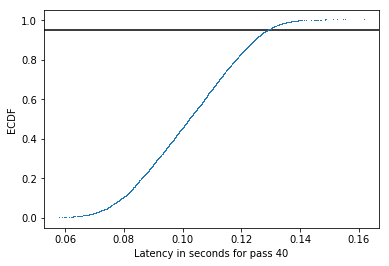

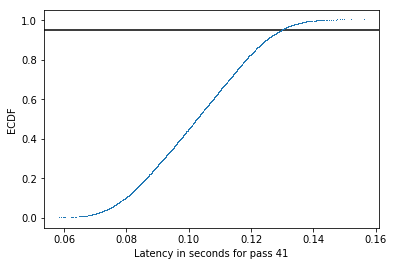

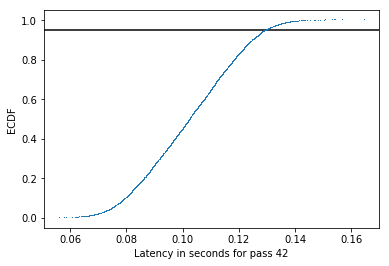

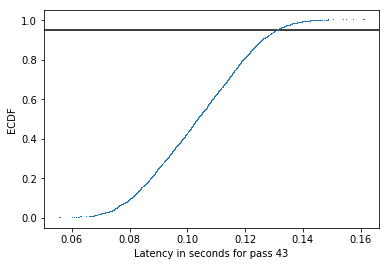

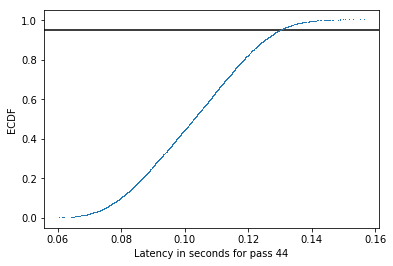

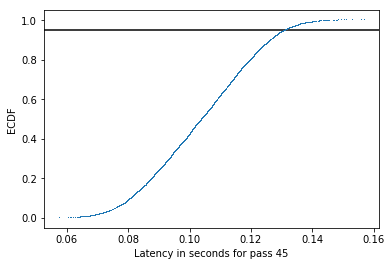

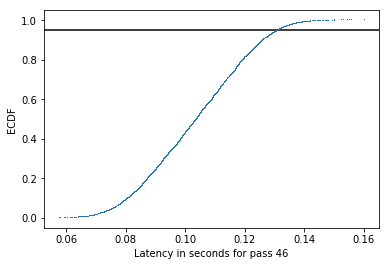

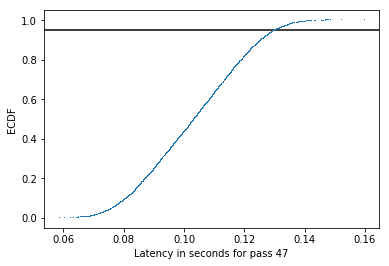

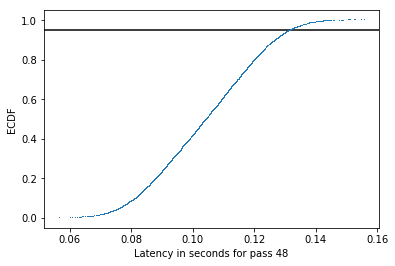

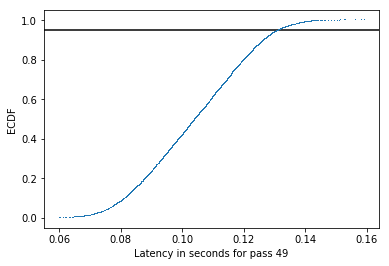

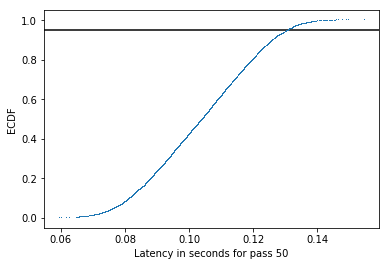

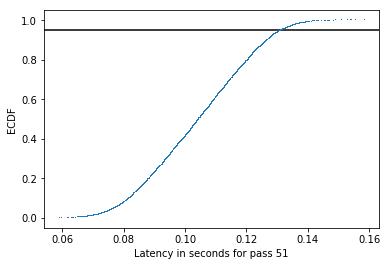

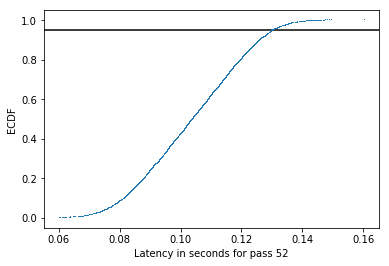

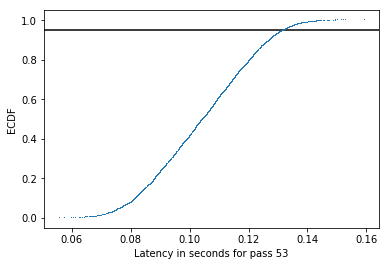

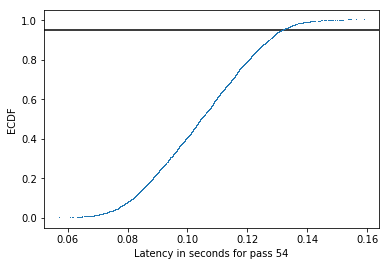

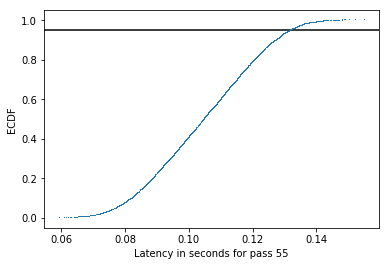

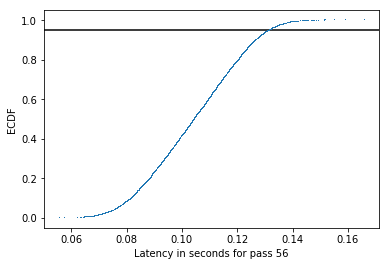

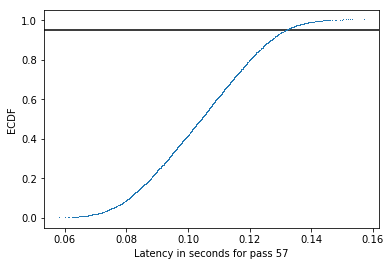

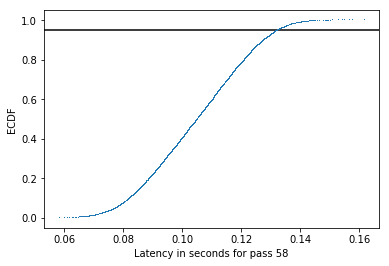

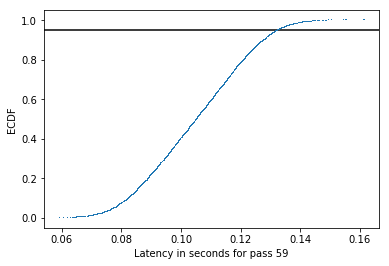

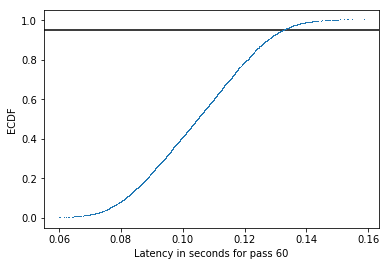

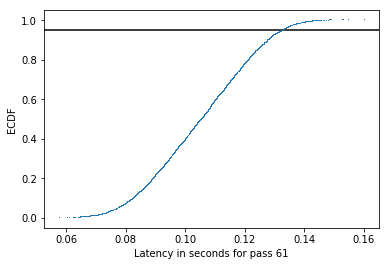

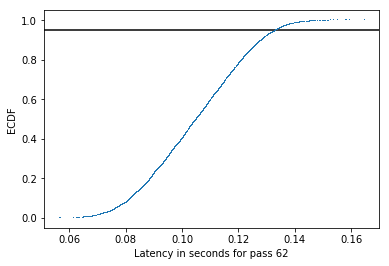

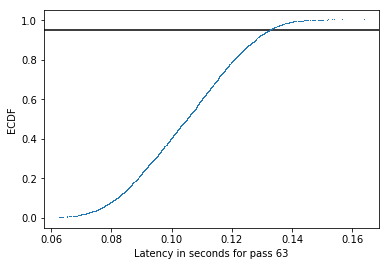

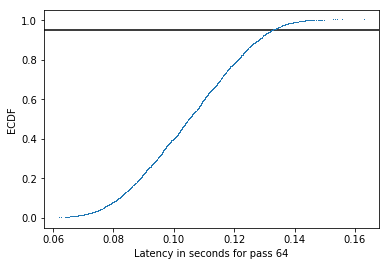

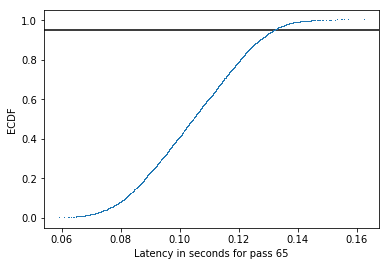

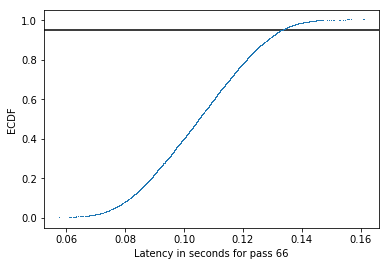

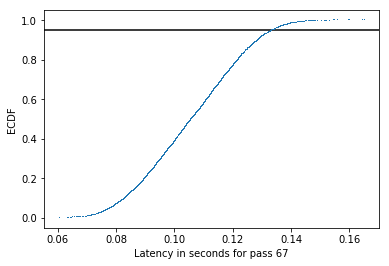

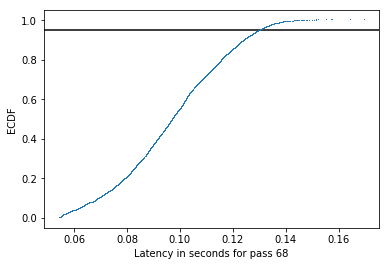

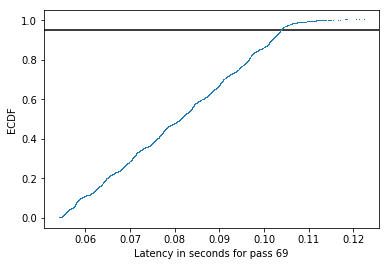

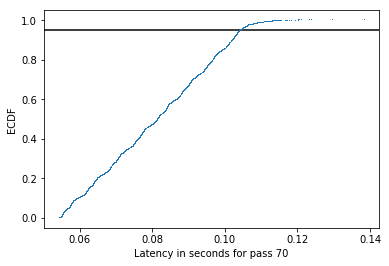

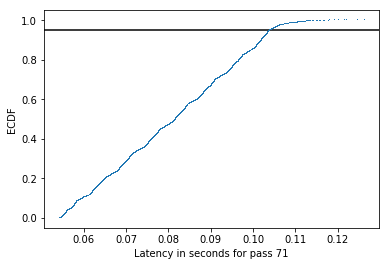

In [0]:
for index, row in df_inception.iterrows():
    plt.figure()
    plt.axhline(y=0.95, color='black', linestyle='-')
    ecdf(x=list(row), x_label='Latency in seconds for pass ' + str(index + 1), ecdf_marker=',', percentile_linestyle='-')

In [0]:
df_resnet = pd.read_csv("test_11_resnet50_results.csv", header=None)
df_resnet.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5352,5353,5354,5355,5356,5357,5358,5359,5360,5361,5362,5363,5364,5365,5366,5367,5368,5369,5370,5371,5372,5373,5374,5375,5376,5377,5378,5379,5380,5381,5382,5383,5384,5385,5386,5387,5388,5389,5390,5391
71,0.081266,0.076136,0.062386,0.071686,0.067292,0.053495,0.058021,0.086465,0.091990,0.086304,0.083046,0.078501,0.068789,0.096938,0.063442,0.069115,0.126668,0.117485,0.122235,0.103182,0.112578,0.098151,0.107661,0.093972,0.105030,0.099990,0.090580,0.094590,0.086258,0.081835,0.072461,0.077661,0.095702,0.076500,0.090556,0.072193,0.062850,0.085911,0.081304,0.067149,...,0.436956,0.423048,0.432698,0.427562,0.407565,0.418664,0.414333,0.401716,0.372212,0.366807,0.361444,0.352909,0.357956,0.344211,0.339255,0.349292,0.424627,0.422934,0.418807,0.404839,0.414675,0.424627,0.409243,0.400433,0.381130,0.372410,0.377013,0.358444,0.363094,0.368080,0.348949,0.353669,0.423536,0.396343,0.419658,0.405981,0.396837,0.415378,0.410861,0.392128
72,0.083054,0.078067,0.073527,0.064760,0.055120,0.050243,0.069036,0.060278,0.098659,0.079994,0.075908,0.066679,0.090034,0.071595,0.085916,0.094751,0.123976,0.113269,0.104989,0.118860,0.100070,0.110047,0.091321,0.096536,0.110708,0.110006,0.105218,0.096052,0.100739,0.087175,0.082382,0.092052,0.138852,0.130408,0.134447,0.107051,0.121056,0.111476,0.125610,0.116888,...,0.414608,0.412727,0.410735,0.409182,0.406260,0.401786,0.397392,0.392909,0.417371,0.403395,0.410162,0.393931,0.398862,0.405478,0.389273,0.384903,0.396873,0.401711,0.385531,0.390392,0.390304,0.397239,0.380647,0.390725,0.385632,0.382559,0.391695,0.378305,0.373562,0.368506,0.362550,0.358856,0.395466,0.374626,0.388479,0.383676,0.379691,0.365217,0.370501,0.392424
73,0.083781,0.079076,0.052140,0.074682,0.064916,0.070266,0.060652,0.051241,0.091284,0.085654,0.082444,0.072968,0.068687,0.059317,0.078229,0.063974,0.111919,0.093016,0.084346,0.098419,0.105755,0.102022,0.079704,0.089196,0.127290,0.122746,0.117932,0.113267,0.102199,0.099446,0.094554,0.108407,0.136391,0.126261,0.126457,0.121163,0.119618,0.115049,0.110459,0.105622,...,0.415592,0.401263,0.387347,0.381873,0.392166,0.391874,0.406403,0.410916,0.396508,0.394704,0.391921,0.386027,0.385648,0.389615,0.381166,0.376783,0.392283,0.402044,0.397235,0.388077,0.383420,0.373965,0.369581,0.378687,0.396364,0.390705,0.386821,0.378091,0.373324,0.368234,0.363912,0.382869,0.403190,0.408690,0.399094,0.394118,0.384785,0.389740,0.380029,0.375661
74,0.098616,0.094069,0.089235,0.071271,0.084404,0.071739,0.070513,0.066096,0.107073,0.094178,0.092617,0.088722,0.078920,0.074526,0.084282,0.102584,0.122069,0.112593,0.116828,0.107788,0.093790,0.103405,0.089618,0.098460,0.114321,0.110001,0.106443,0.101621,0.096579,0.092282,0.085798,0.082692,0.125152,0.119971,0.110641,0.101640,0.115869,0.106076,0.090953,0.097210,...,0.416671,0.411331,0.418161,0.404990,0.407879,0.408167,0.402225,0.412514,0.393108,0.385325,0.399279,0.371471,0.380484,0.390227,0.404336,0.376108,0.383104,0.364567,0.369747,0.355262,0.373254,0.378428,0.350208,0.360063,0.417351,0.415145,0.413716,0.408575,0.410932,0.406936,0.401700,0.397394,0.397491,0.396825,0.406348,0.392884,0.383815,0.374738,0.388052,0.379780
75,0.121684,0.098737,0.115724,0.099273,0.107851,0.094152,0.112677,0.126242,0.112872,0.112470,0.107885,0.098142,0.088372,0.103140,0.084216,0.094054,0.124838,0.120826,0.111569,0.115680,0.106117,0.102381,0.097356,0.092559,0.091896,0.087208,0.082819,0.076418,0.073077,0.068770,0.064079,0.058443,0.128335,0.123270,0.120308,0.115691,0.112525,0.108214,0.103817,0.099229,...,0.463718,0.469235,0.459428,0.440685,0.453400,0.450395,0.445424,0.436758,0.446621,0.427586,0.422770,0.418390,0.441555,0.413770,0.436782,0.430826,0.454383,0.449676,0.444783,0.433519,0.425771,0.433610,0.429636,0.421571,0.425336,0.409563,0.424831,0.415339,0.405956,0.401824,0.396971,0.420103,0.431744,0.430460,0.416530,0.421256,0.425464,0.411905,0.406769,0.402526


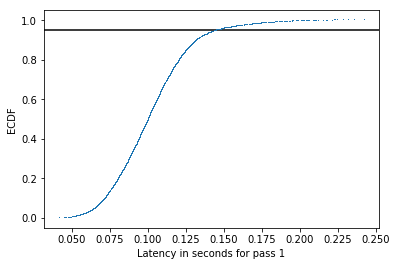

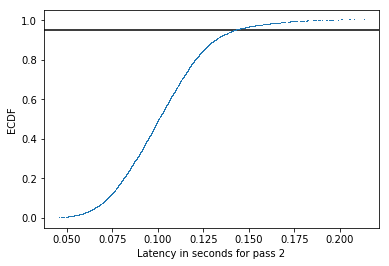

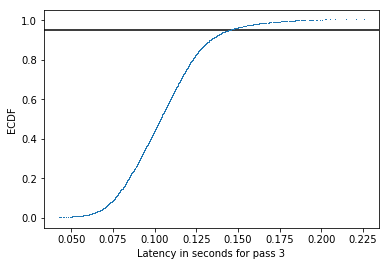

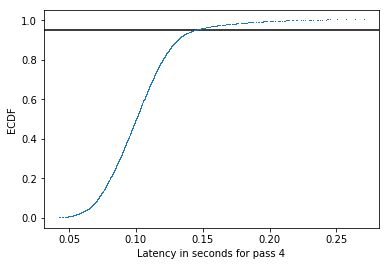

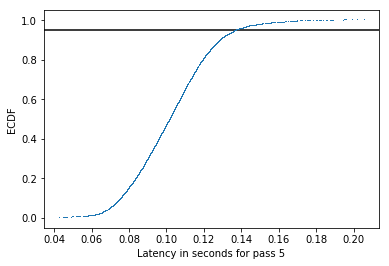

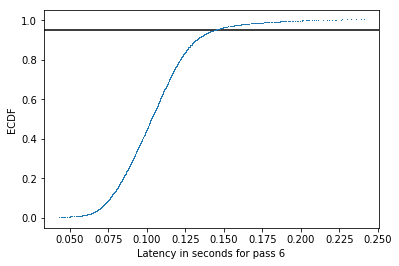

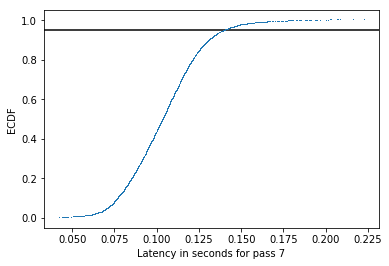

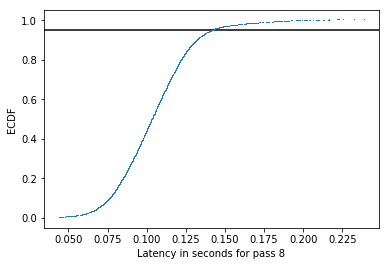

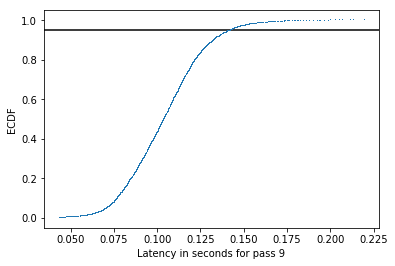

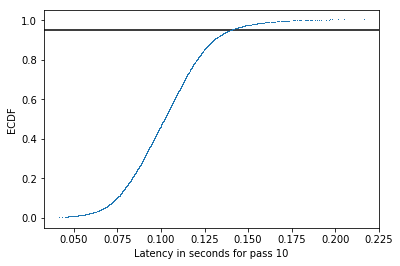

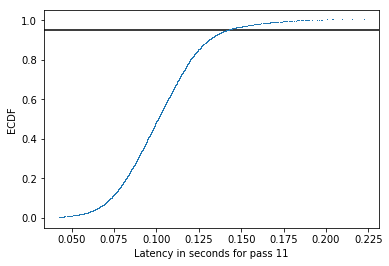

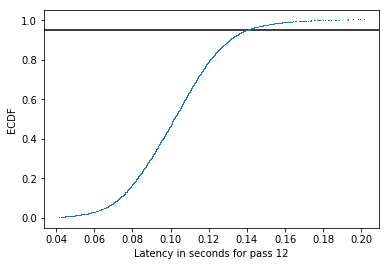

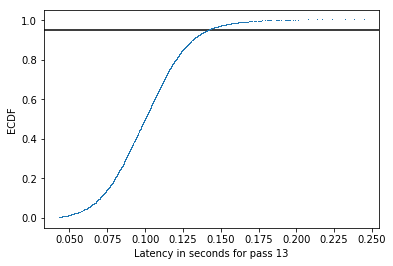

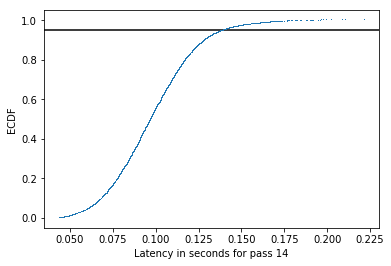

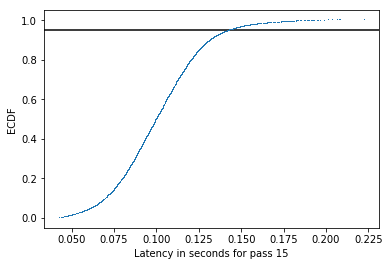

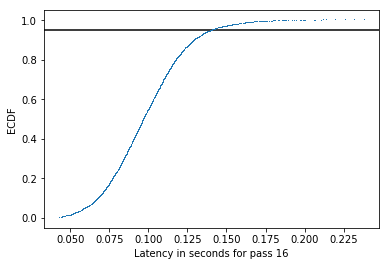

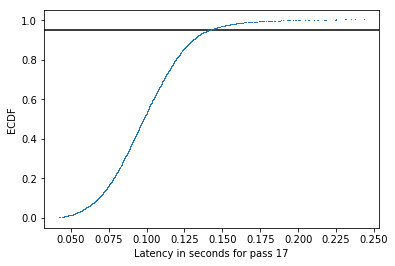

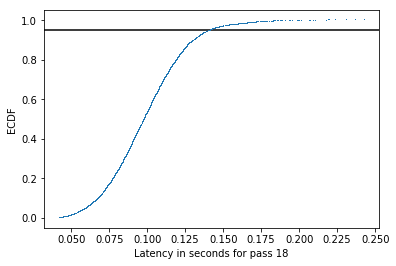

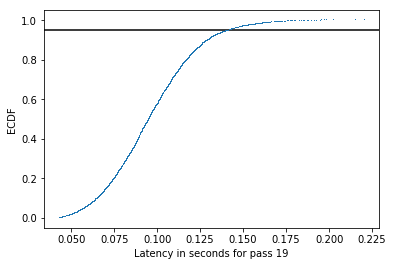

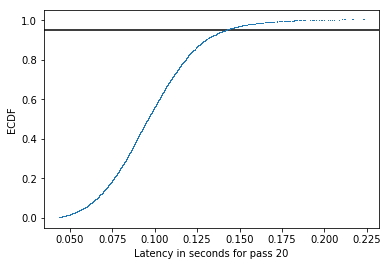

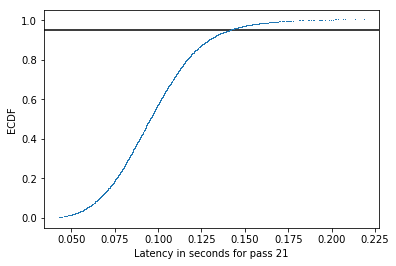

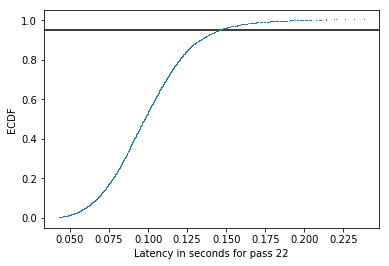

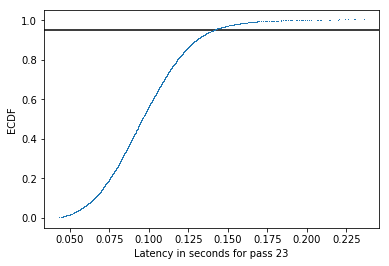

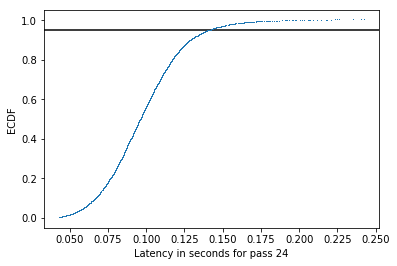

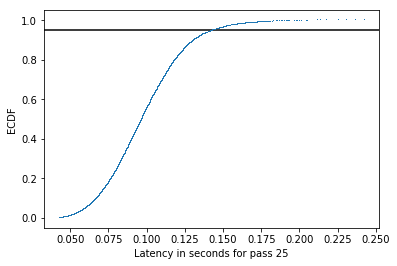

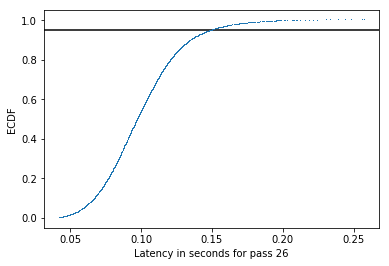

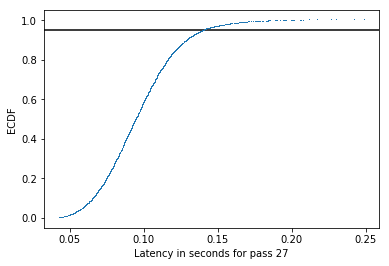

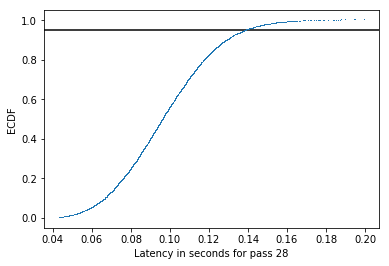

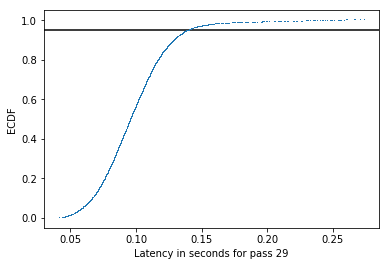

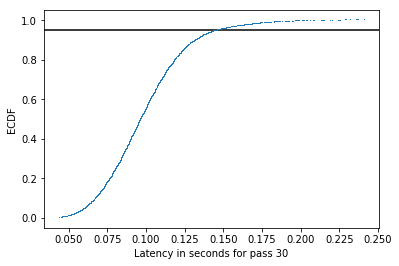

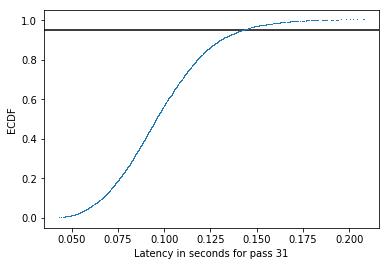

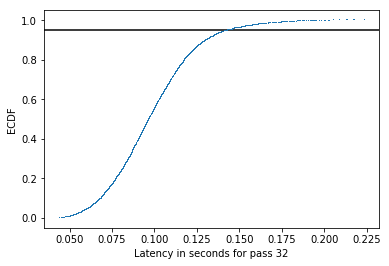

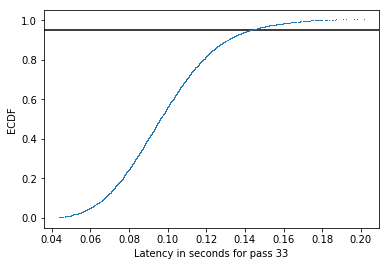

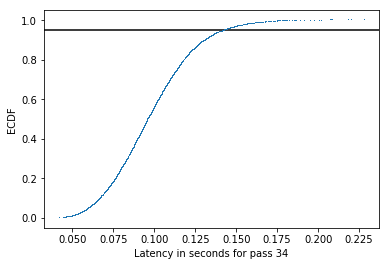

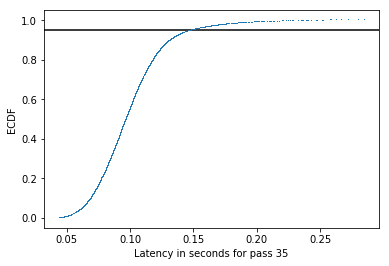

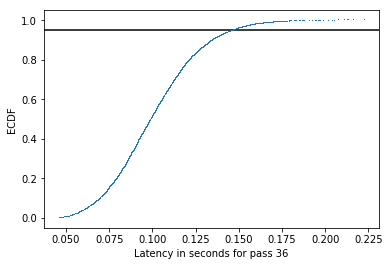

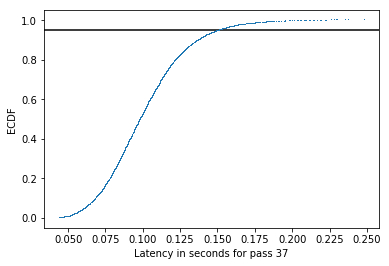

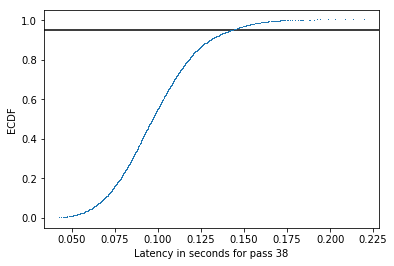

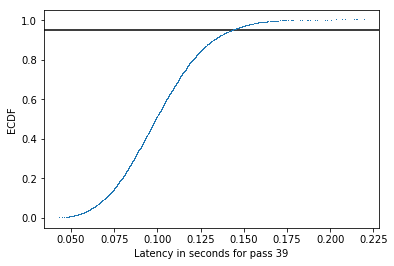

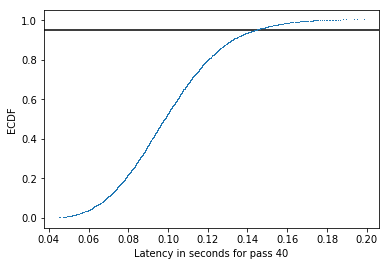

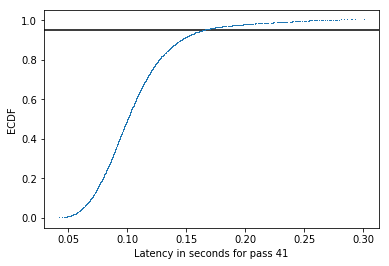

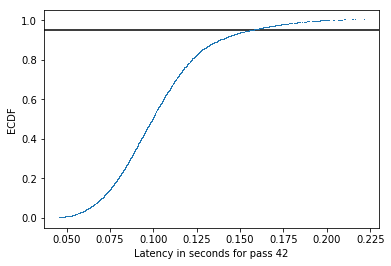

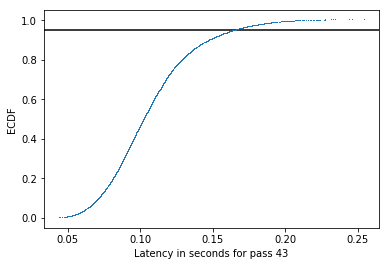

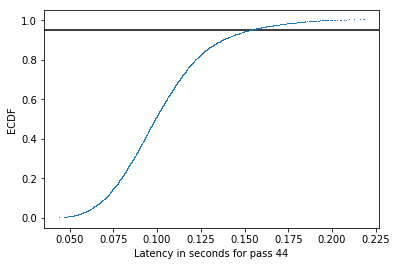

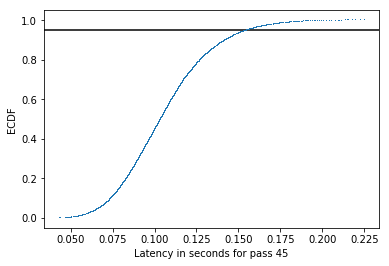

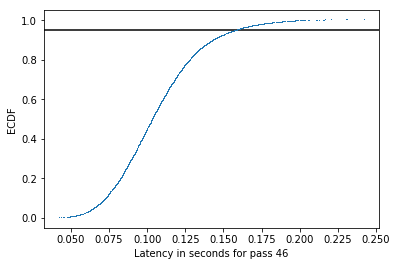

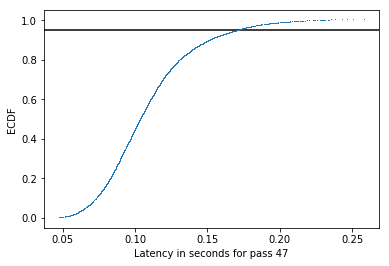

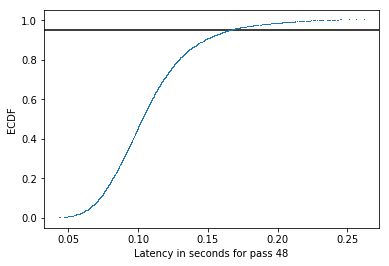

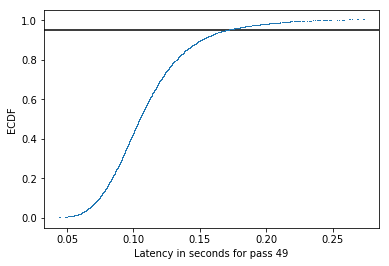

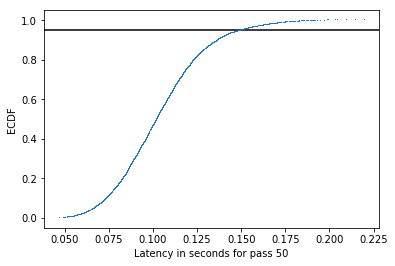

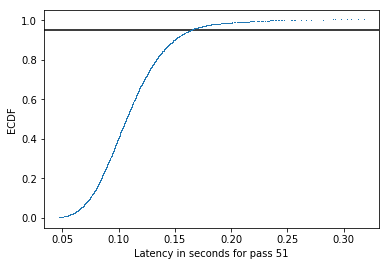

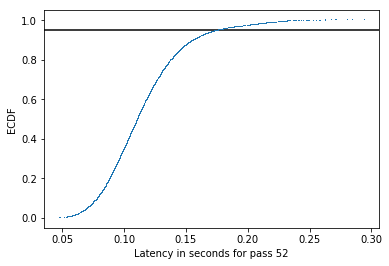

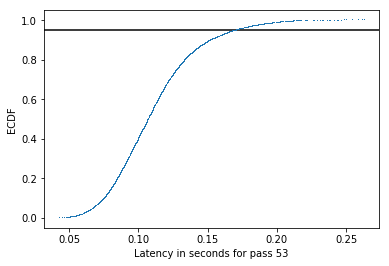

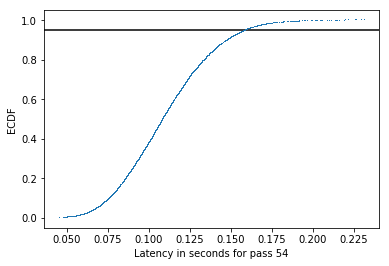

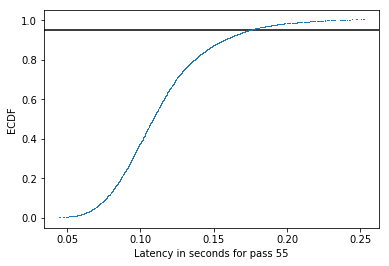

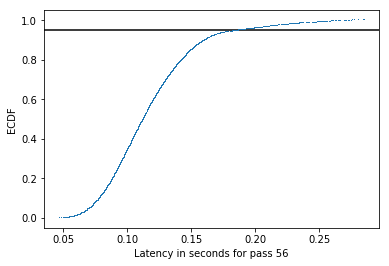

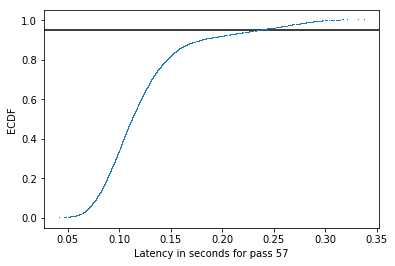

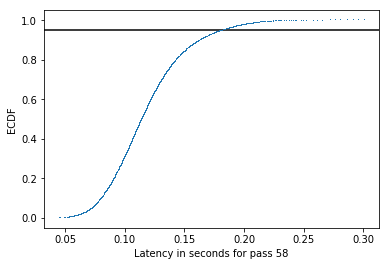

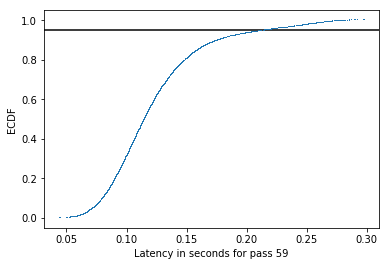

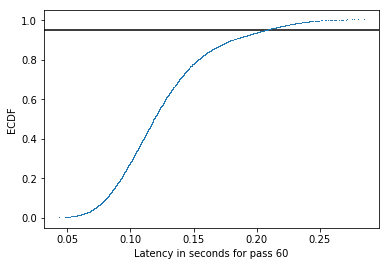

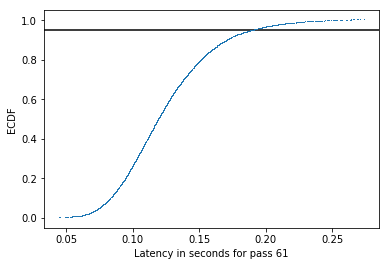

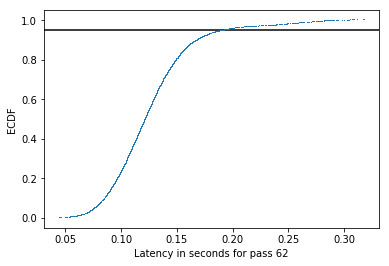

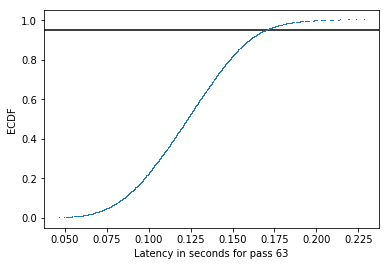

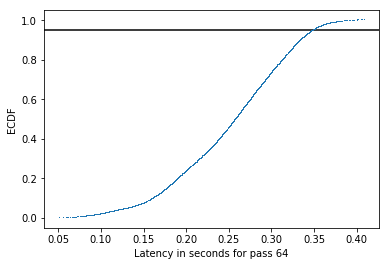

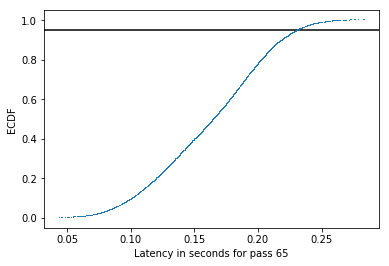

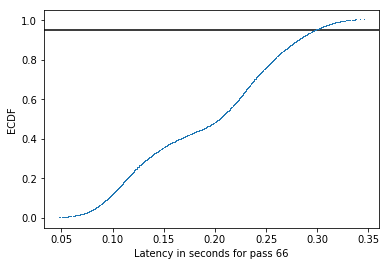

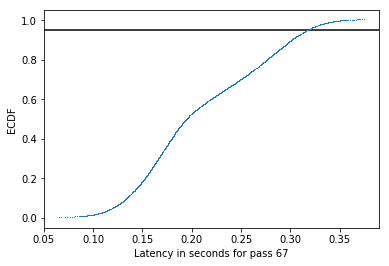

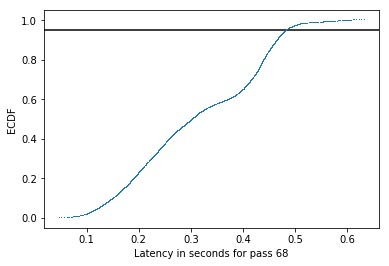

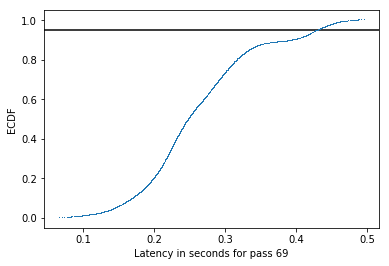

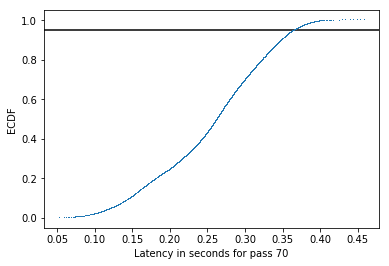

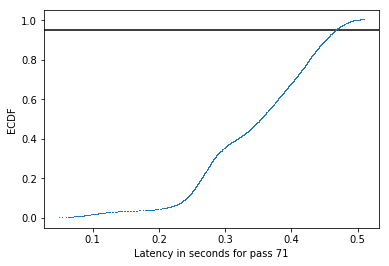

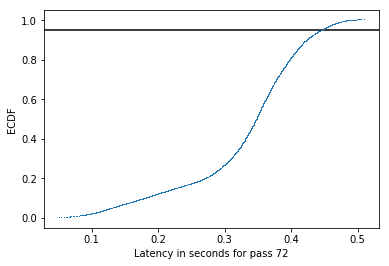

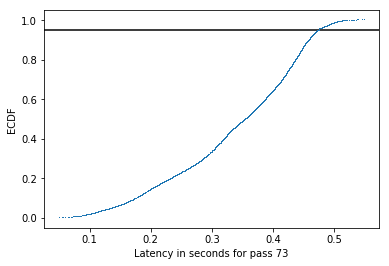

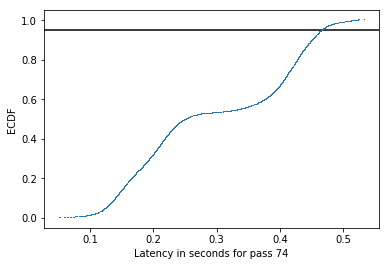

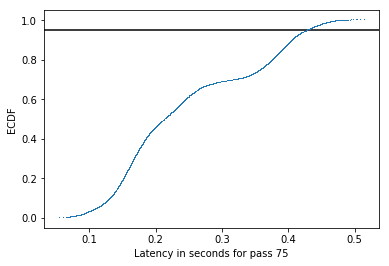

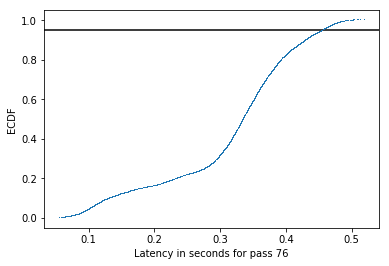

In [0]:
for index, row in df_resnet.iterrows():
    plt.figure()
    plt.axhline(y=0.95, color='black', linestyle='-')
    ecdf(x=list(row), x_label='Latency in seconds for pass ' + str(index + 1), ecdf_marker=',', percentile_linestyle='-')

## Inception Test Output

In [0]:
!cat test_11_resnet50_output.txt

Pass 1: started
Pass 1: total batches 5392
Pass 1: elapsed time 36.7000367641449 s
Pass 1: desired throughput 150.0 qps
Pass 1: actual throughput 146.920833748806 qps
Pass 1: 25th-percentile 0.0845981240272522 s
Pass 1: 50th-percentile 0.10034704208374023 s
Pass 1: 75th-percentile 0.11632925271987915 s
Pass 1: 95th-percentile 0.14596662521362302 s
Pass 1: completed
Pass 2: started
Pass 2: total batches 5392
Pass 2: elapsed time 36.43785500526428 s
Pass 2: desired throughput 151.0 qps
Pass 2: actual throughput 147.9779750817111 qps
Pass 2: 25th-percentile 0.08520811796188354 s
Pass 2: 50th-percentile 0.10068953037261963 s
Pass 2: 75th-percentile 0.11701947450637817 s
Pass 2: 95th-percentile 0.14385710954666137 s
Pass 2: completed
Pass 3: started
Pass 3: total batches 5392
Pass 3: elapsed time 36.24434018135071 s
Pass 3: desired throughput 152.0 qps
Pass 3: actual throughput 148.76805517829288 qps
Pass 3: 25th-percentile 0.08855551481246948 s
Pass 3: 50th-percentile 0.10379159450531006 s

## Resnet Test Output

In [0]:
!cat test_11_inception_output.txt

Pass 1: started
Pass 1: total batches 5392
Pass 1: elapsed time 35.66799354553223 s
Pass 1: desired throughput 154.0 qps
Pass 1: actual throughput 151.1719461627917 qps
Pass 1: 25th-percentile 0.06957519054412842 s
Pass 1: 50th-percentile 0.08269393444061279 s
Pass 1: 75th-percentile 0.09566003084182739 s
Pass 1: 95th-percentile 0.10537229776382445 s
Pass 1: completed
Pass 2: started
Pass 2: total batches 5392
Pass 2: elapsed time 35.647056579589844 s
Pass 2: desired throughput 154.0 qps
Pass 2: actual throughput 151.26073559428903 qps
Pass 2: 25th-percentile 0.06916475296020508 s
Pass 2: 50th-percentile 0.08235883712768555 s
Pass 2: 75th-percentile 0.09535115957260132 s
Pass 2: 95th-percentile 0.10538538694381713 s
Pass 2: completed
Pass 3: started
Pass 3: total batches 5392
Pass 3: elapsed time 35.731478214263916 s
Pass 3: desired throughput 154.0 qps
Pass 3: actual throughput 150.90335663324242 qps
Pass 3: 25th-percentile 0.06889545917510986 s
Pass 3: 50th-percentile 0.0819830894470

# Plots

## GPU Utilization

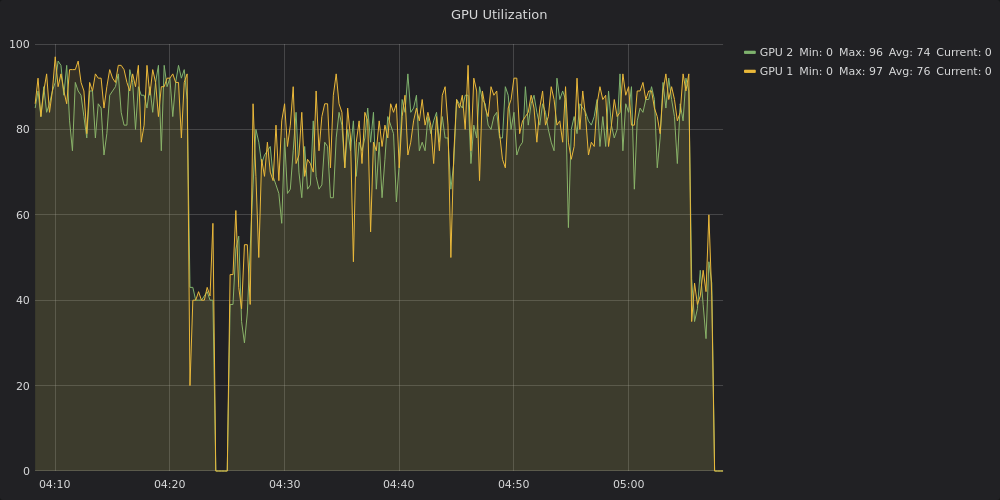

In [0]:
Image(filename='test_11_gpu_utilization.png')

## GPU Memory Utilization

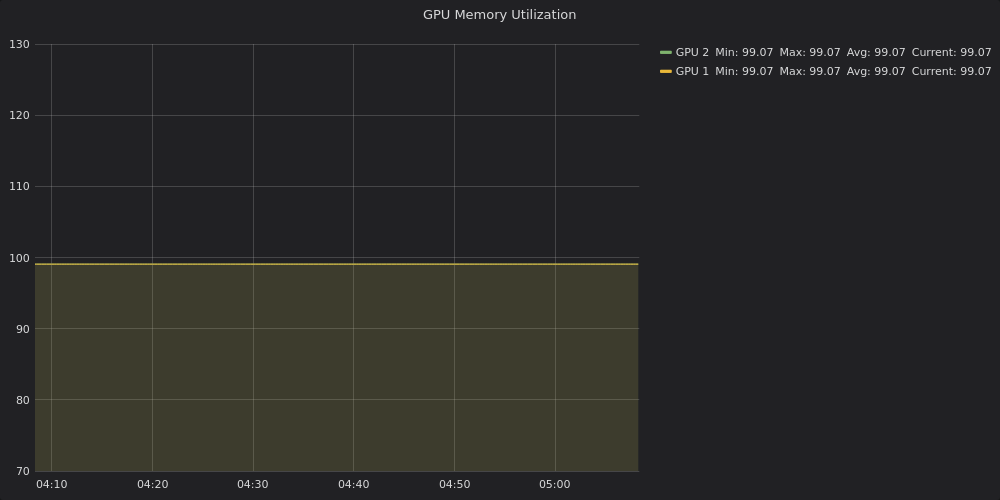

In [0]:
Image(filename='test_11_gpu_memory_utilization.png')

## Host CPU Usage

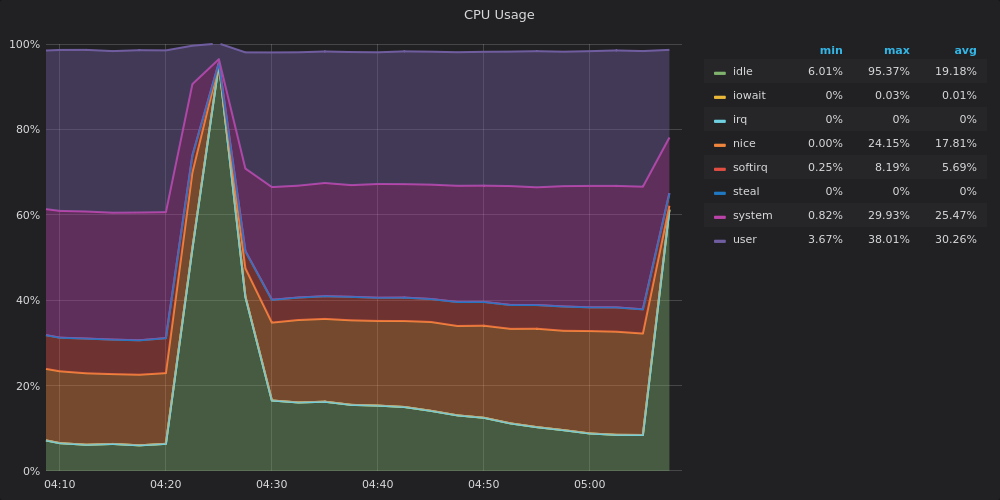

In [0]:
Image(filename='test_11_host_cpu_usage.png')

## Host Memory Usage

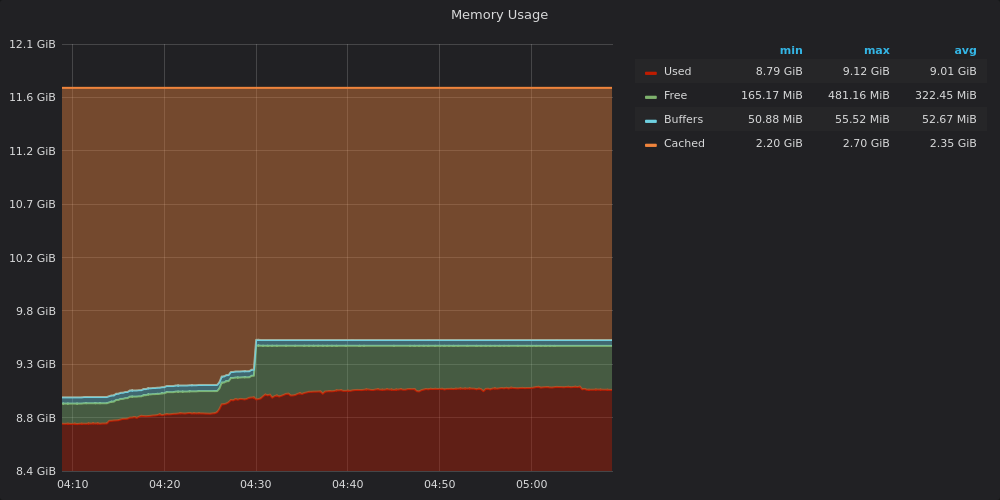

In [0]:
Image(filename='test_11_host_memory_usage.png')

## Host Network Usage

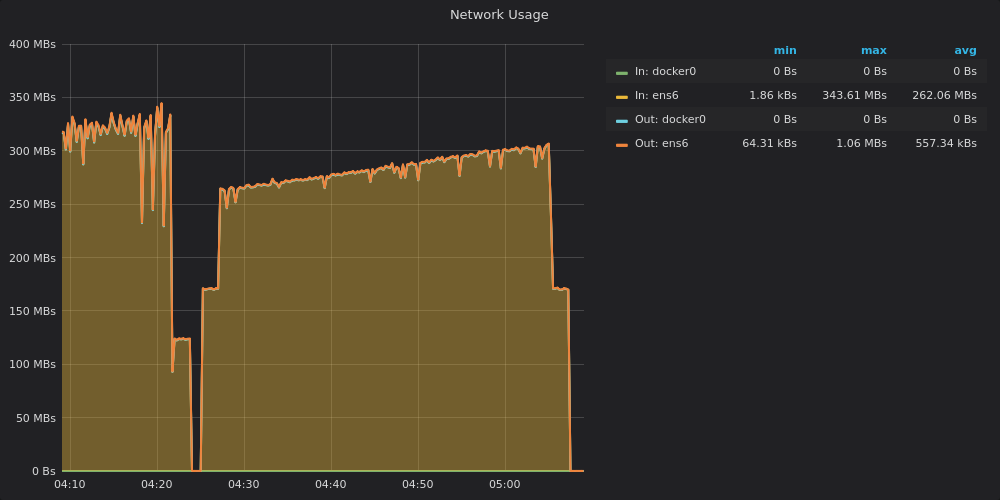

In [0]:
Image(filename='test_11_host_network_usage.png')